# Basic Statistics Analysis



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')

data_path = "sales_data_with_discounts.csv"
df = pd.read_csv(data_path)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.head()


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2021-04-01,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,2021-04-01,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,2021-04-01,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,2021-04-01,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,2021-04-01,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [12]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.info()


Rows: 450, Columns: 13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               450 non-null    datetime64[ns]
 1   Day                450 non-null    object        
 2   SKU                450 non-null    object        
 3   City               450 non-null    object        
 4   Volume             450 non-null    int64         
 5   BU                 450 non-null    object        
 6   Brand              450 non-null    object        
 7   Model              450 non-null    object        
 8   Avg Price          450 non-null    int64         
 9   Total Sales Value  450 non-null    int64         
 10  Discount Rate (%)  450 non-null    float64       
 11  Discount Amount    450 non-null    float64       
 12  Net Sales Value    450 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(3)

## Descriptive Analytics 
Identify numerical and categorical variables for downstream analysis.


In [13]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
Categorical columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


In [14]:
mode_vals = df[numeric_cols].mode().iloc[0]
stats = pd.DataFrame({
    "mean": df[numeric_cols].mean(),
    "median": df[numeric_cols].median(),
    "mode": mode_vals,
    "std_dev": df[numeric_cols].std()
})
stats


,mean,median,mode,std_dev
Volume,5.066667,4.000000,3.000000,4.231602
Avg Price,10453.433333,1450.000000,400.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.000000,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,4.220602
Discount Amount,3346.499424,988.933733,69.177942,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,46358.656624


**Interpretation**
- Sales value measures (`Total Sales Value`, `Net Sales Value`) show high means and large standard deviations, indicating a wide spread in transaction sizes.
- `Discount Rate (%)` varies modestly with a tight standard deviation, implying consistent discounting policies.
- `Volume` and `Discount Amount` are right-skewed, as the mean exceeds the median, pointing to a handful of large orders driving the averages.


## Data Visualization


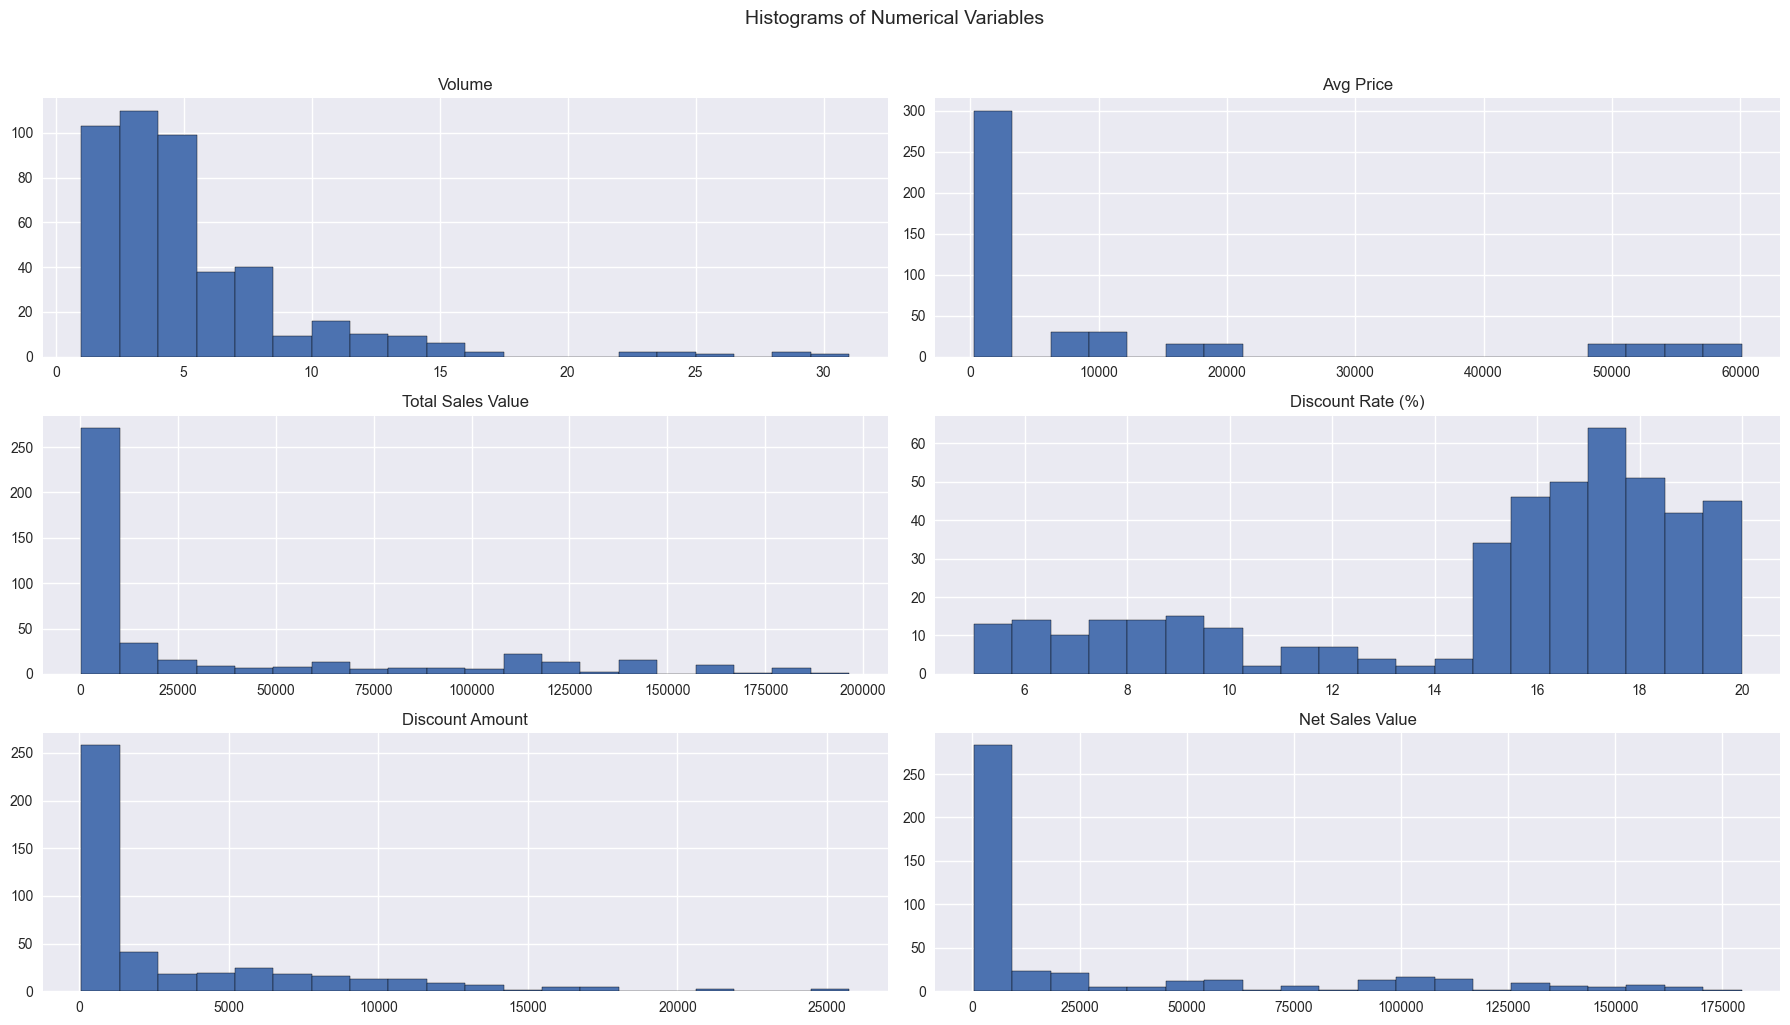

In [15]:
df[numeric_cols].hist(figsize=(18, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Variables', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


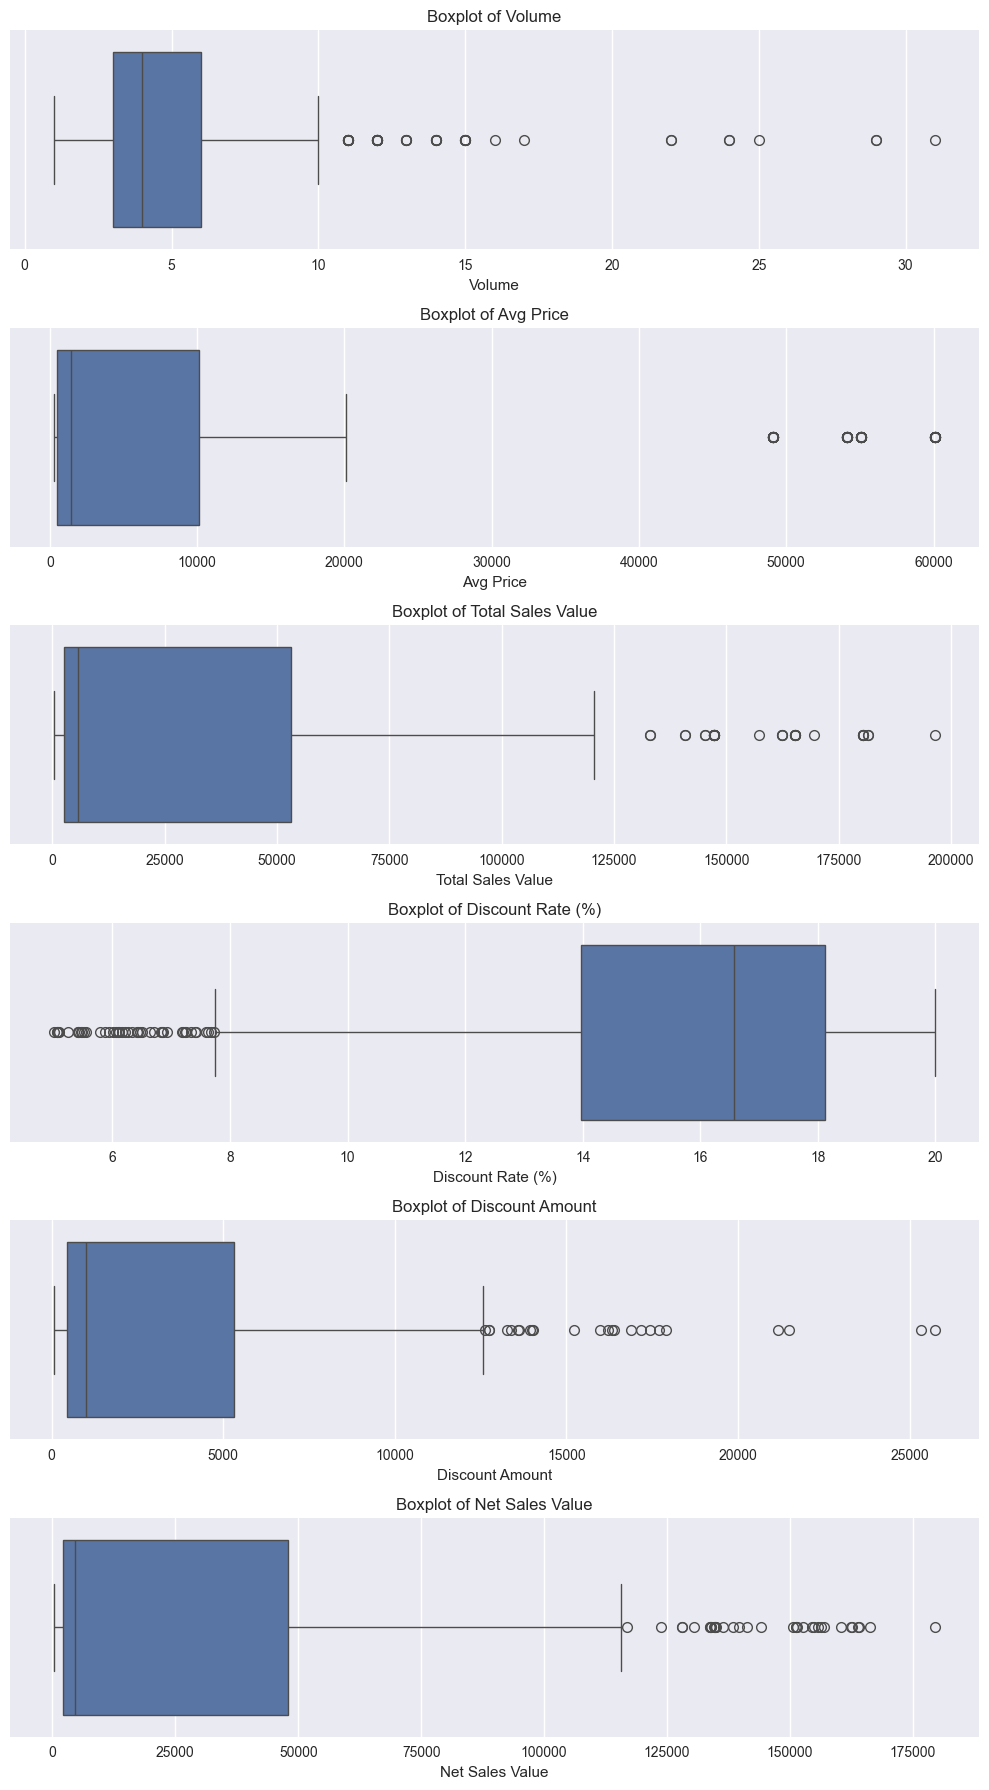

In [16]:
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 3 * len(numeric_cols)))
for idx, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[idx], color="#4c72b0")
    axes[idx].set_title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


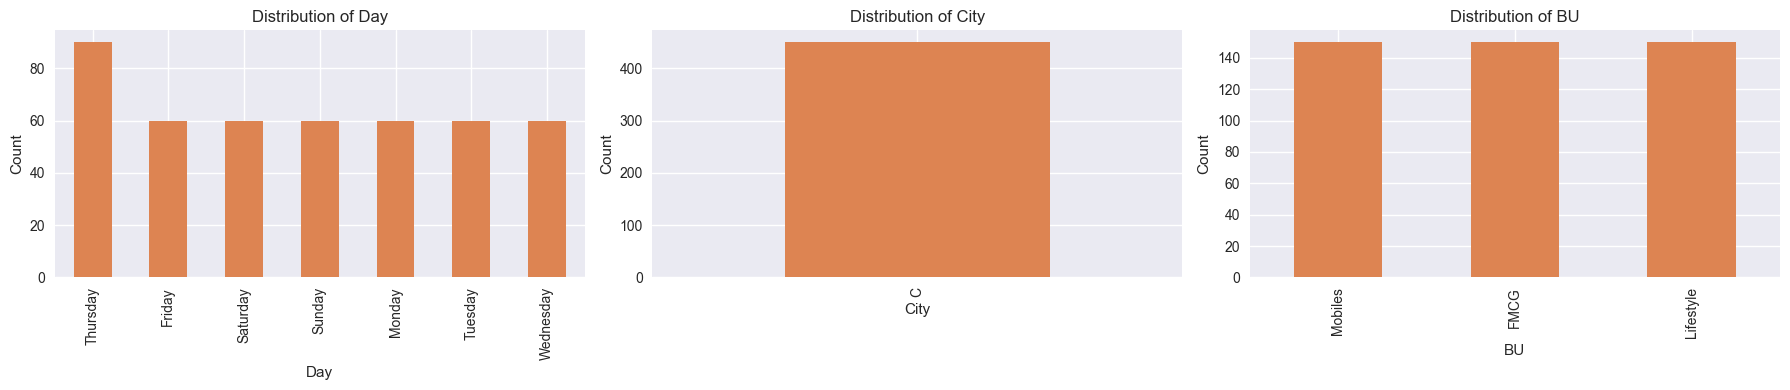

In [17]:
cat_examples = ['Day', 'City', 'BU']
fig, axes = plt.subplots(1, len(cat_examples), figsize=(6 * len(cat_examples), 4))
for ax, col in zip(axes, cat_examples):
    df[col].value_counts().plot(kind='bar', ax=ax, color="#dd8452")
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()


**Visualization takeaways**
- Histograms confirm positively skewed revenue-related measures with a concentration of smaller orders.
- Boxplots highlight high-value outliers across sales columns and a few unusually large discount amounts.
- Bar charts show near-uniform weekday activity aside from a Thursday bump, all transactions occurring in City `C`, and business units evenly split across Mobiles, FMCG, and Lifestyle.


## Standardization of Numerical Variables
Standardize numerical fields with z-score normalization to align magnitudes.


In [18]:
standardized = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()
standardized.columns = [f"{col}_z" for col in standardized.columns]
comparison = pd.DataFrame({
    "original_mean": df[numeric_cols].mean(),
    "standardized_mean": standardized.mean(),
    "original_std": df[numeric_cols].std(),
    "standardized_std": standardized.std()
})
comparison


,original_mean,standardized_mean,original_std,standardized_std
Avg Price,10453.433333,NaN,18079.904840,NaN
Avg Price_z,NaN,4.342206e-17,NaN,1.0
Discount Amount,3346.499424,NaN,4509.902963,NaN
Discount Amount_z,NaN,-6.315935e-17,NaN,1.0
Discount Rate (%),15.155242,NaN,4.220602,NaN
Discount Rate (%)_z,NaN,-4.144833e-17,NaN,1.0
Net Sales Value,30466.336131,NaN,46358.656624,NaN
Net Sales Value_z,NaN,1.973730e-17,NaN,1.0
Total Sales Value,33812.835556,NaN,50535.074173,NaN
Total Sales Value_z,NaN,1.578984e-17,NaN,1.0


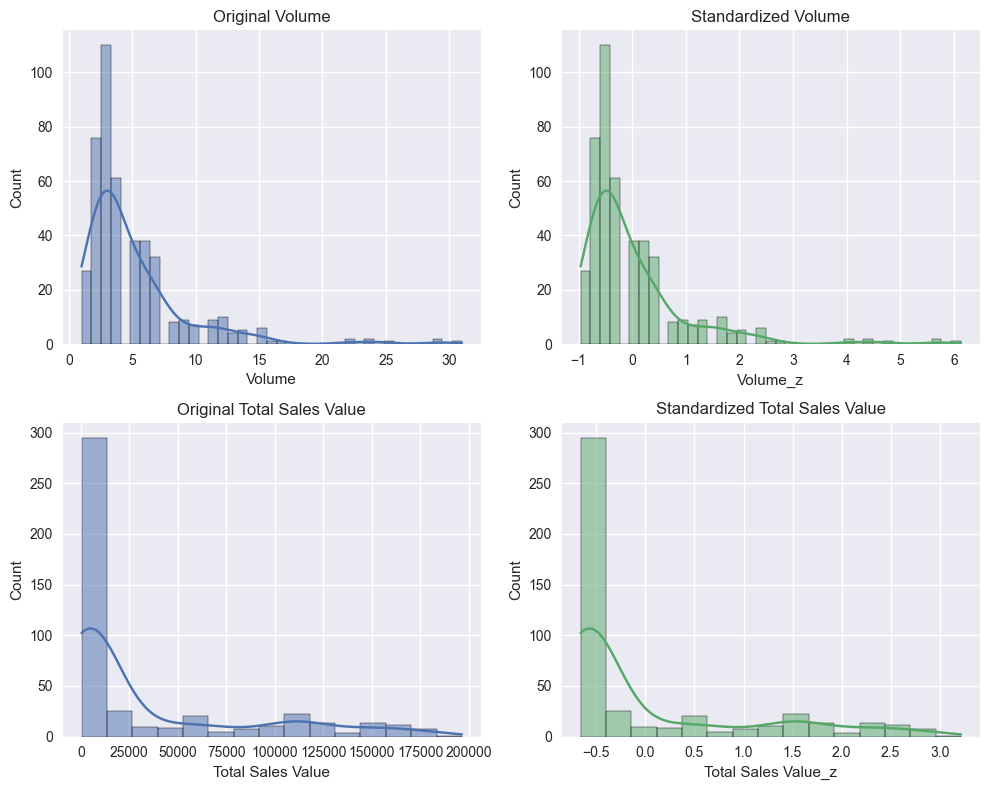

In [19]:
cols_to_compare = ['Volume', 'Total Sales Value']
fig, axes = plt.subplots(len(cols_to_compare), 2, figsize=(10, 4 * len(cols_to_compare)))
for i, col in enumerate(cols_to_compare):
    sns.histplot(df[col], ax=axes[i, 0], kde=True, color="#4c72b0")
    axes[i, 0].set_title(f"Original {col}")
    sns.histplot(standardized[f"{col}_z"], ax=axes[i, 1], kde=True, color="#55a868")
    axes[i, 1].set_title(f"Standardized {col}")
plt.tight_layout()
plt.show()


Standardization centers the means at ~0 and scales the standard deviations to ~1, keeping each variable's distributional shape while aligning magnitudes for modeling.


## One-Hot Encoding for Categorical Variables


In [20]:
categorical_ready = df.copy()
categorical_ready['Date'] = categorical_ready['Date'].dt.strftime('%Y-%m-%d')
df_dummies = pd.get_dummies(categorical_ready, columns=categorical_cols, drop_first=False)
print(df_dummies.shape)
df_dummies.head()


(450, 101)


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_2021-04-01,Date_2021-04-02,Date_2021-04-03,Date_2021-04-04,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Conclusion
- High sales variability and right-skewed distributions emphasize the need for robust estimators and scaling prior to modeling.
- Visualization confirms recurring outliers in revenue metrics and shows that all records come from City `C` while each BU contributes equally sized cohorts.
- Standardization and dummy encoding deliver a model-ready table where each feature contributes on a comparable scale, setting up downstream predictive or clustering workflows.
